# In this file i aim to see the different Temp structures in ORAs and EC-Earth

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import numpy as np
import xesmf as xe
from   scipy.interpolate import griddata
import dask as dsk

import hvplot.xarray
import hvplot.pandas

from   cartopy import config
import cartopy.crs as ccrs
proj = ccrs.PlateCarree()

from scipy import stats
from scipy.stats import t

# ORAs

In [3]:
temp = xr.open_mfdataset("/nobackup/users/ommeren/regrid_pac.nc")
temp

<xarray.Dataset>
Dimensions:   (time: 684, deptht: 38, lat: 180, lon: 170)
Coordinates:
  * deptht    (deptht) float32 1.556 2.668 3.856 5.14 ... 370.7 411.8 457.6
  * time      (time) datetime64[ns] 1958-01-16 1958-02-15 ... 2014-12-16
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
Data variables:
    votemper  (time, deptht, lat, lon) float32 dask.array<chunksize=(684, 38, 180, 170), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

### **Equator**

In [4]:
# Mean equator (lat=0)
equator_ORAs = temp["votemper"].sel(lat=0, method="nearest")

equator_mean_ORAs = equator_ORAs.mean(dim="time", skipna=True)
equator_mean_ORAs

<xarray.DataArray 'votemper' (deptht: 38, lon: 170)>
dask.array<mean_agg-aggregate, shape=(38, 170), dtype=float32, chunksize=(38, 170), chunktype=numpy.ndarray>
Coordinates:
  * deptht   (deptht) float32 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 0.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5

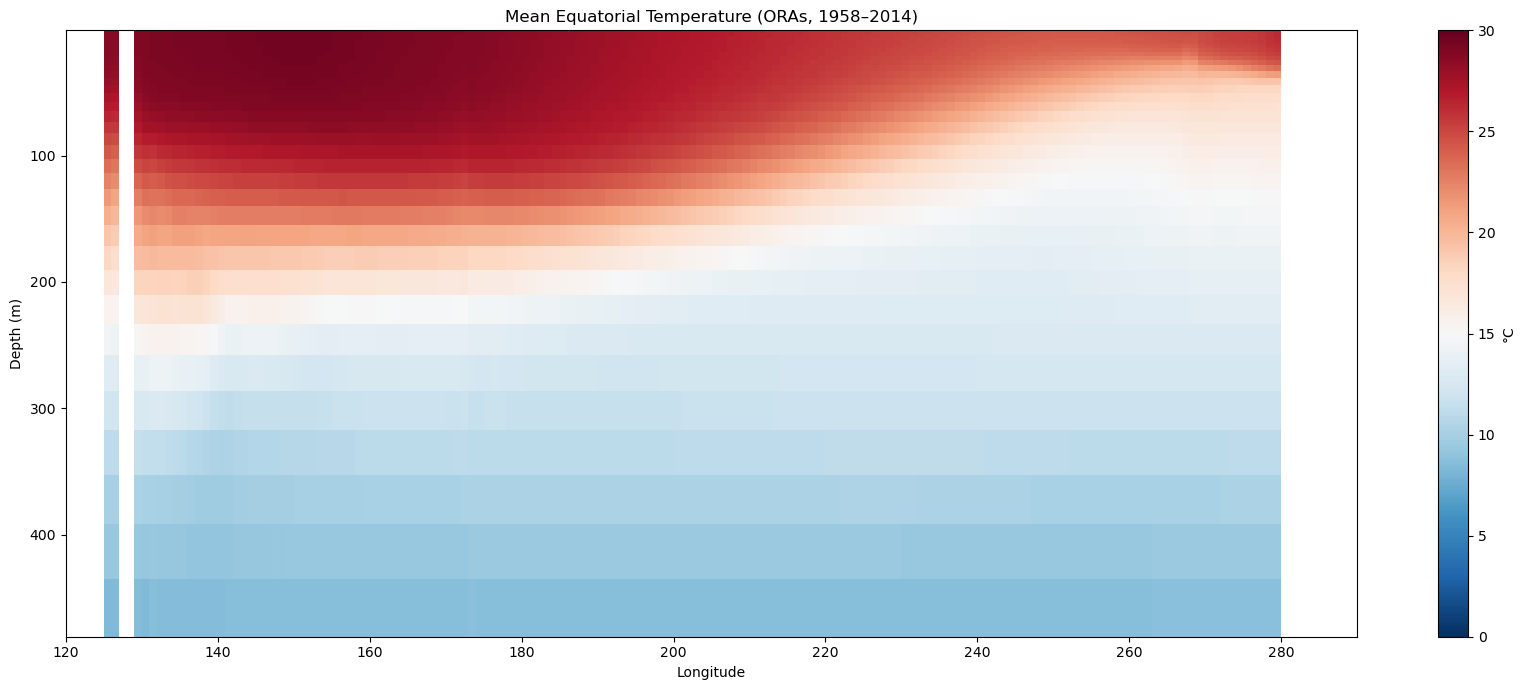

In [4]:
plt.figure(figsize=(17, 7))
equator_mean_ORAs.plot(
    cmap="RdBu_r",
    vmin=0,
    vmax=30,
    yincrease=False,  
    cbar_kwargs={"label": "°C"}
)

plt.title("Mean Equatorial Temperature (ORAs, 1958–2014)")
plt.xlabel("Longitude")
plt.ylabel("Depth (m)")
plt.tight_layout()
plt.show()

### **-25°**

In [4]:
# Mean 25°S
bp_ORAs = temp["votemper"].sel(lat=-25, method="nearest")

bp_mean_ORAs = bp_ORAs.mean(dim="time", skipna=True)
bp_mean_ORAs

<xarray.DataArray 'votemper' (deptht: 38, lon: 170)>
dask.array<mean_agg-aggregate, shape=(38, 170), dtype=float32, chunksize=(38, 170), chunktype=numpy.ndarray>
Coordinates:
  * deptht   (deptht) float32 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 -24.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5

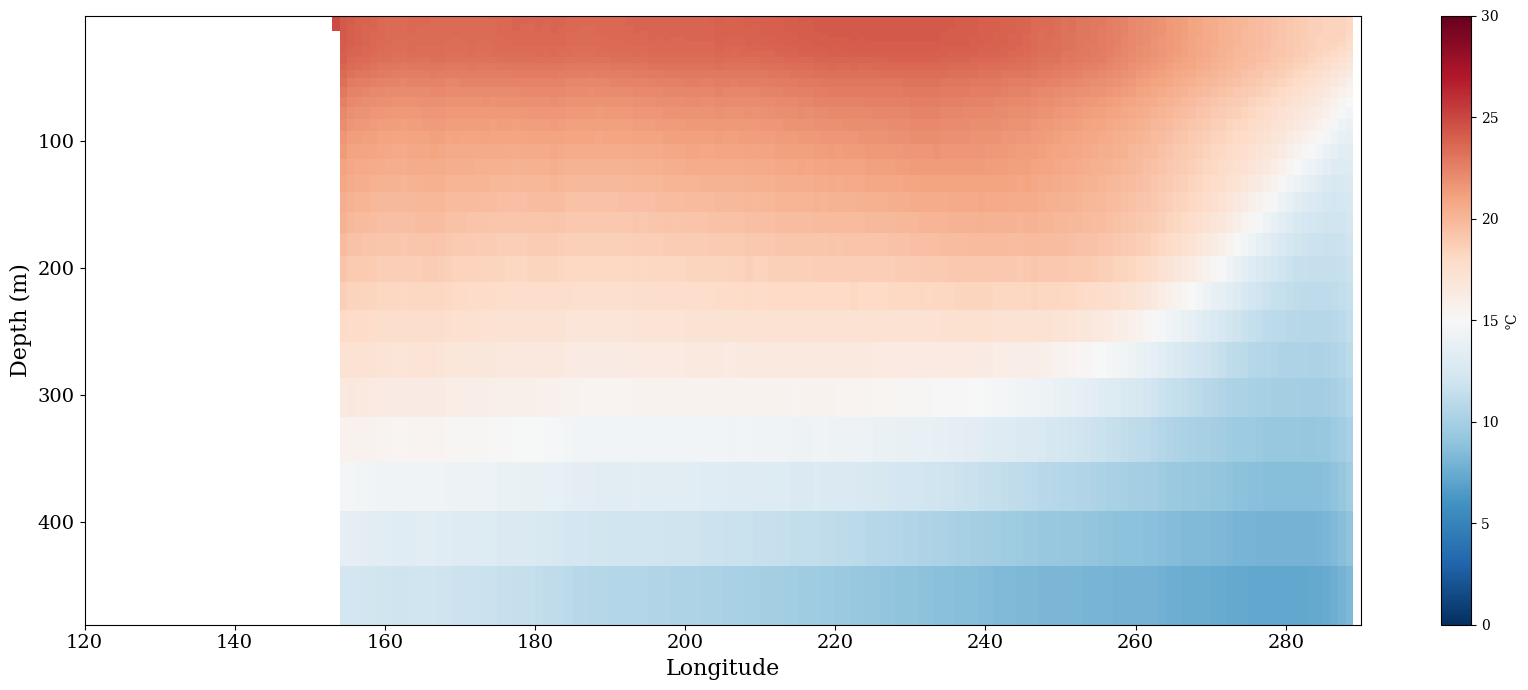

In [6]:
#Font 
plt.rcParams['font.family'] = 'serif'

# Create figure
plt.figure(figsize=(17, 7))

# Plot
p = bp_mean_ORAs.plot(
    cmap="RdBu_r",
    vmin=0,
    vmax=30,
    yincrease=False,
    cbar_kwargs={"label": "°C"}
)

# Remove title
p.axes.set_title("")

# Customize axes
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Depth (m)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

# Save and show
plt.tight_layout()
plt.savefig("mean_temp_ORAs5_25S.png", dpi=300)
plt.show()



# -------------------------------------------------------------------------

# EC-Earth:

In [6]:
temp_EC = xr.open_mfdataset("/nobackup/users/ommeren/EC_regrid_pac.nc")
temp_EC

<xarray.Dataset>
Dimensions:             (time: 1980, vertices: 4, lat: 180, lon: 170, lev: 38)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12...
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 dask.array<chunksize=(1980, 4, 180, 170, 38), meta=np.ndarray>
    vertices_longitude  (time, vertices, lat, lon, lev) float64 dask.array<chunksize=(1980, 4, 180, 170, 38), meta=np.ndarray>
    thetao              (time, lev, lat, lon) float32 dask.array<chunksize=(1980, 38, 180, 170), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

### **Equator**

In [7]:
# Mean equator
equator_EC = temp_EC["thetao"].sel(lat=0, method="nearest")

# Subset the time to match ORAs (1958–2014)
equator_EC = equator_EC.sel(time=slice("1958-01-01", "2014-12-31"))

equator_mean_EC = equator_EC.mean(dim="time", skipna=True)
equator_mean_EC

<xarray.DataArray 'thetao' (lev: 38, lon: 170)>
dask.array<mean_agg-aggregate, shape=(38, 170), dtype=float32, chunksize=(38, 170), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 0.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5

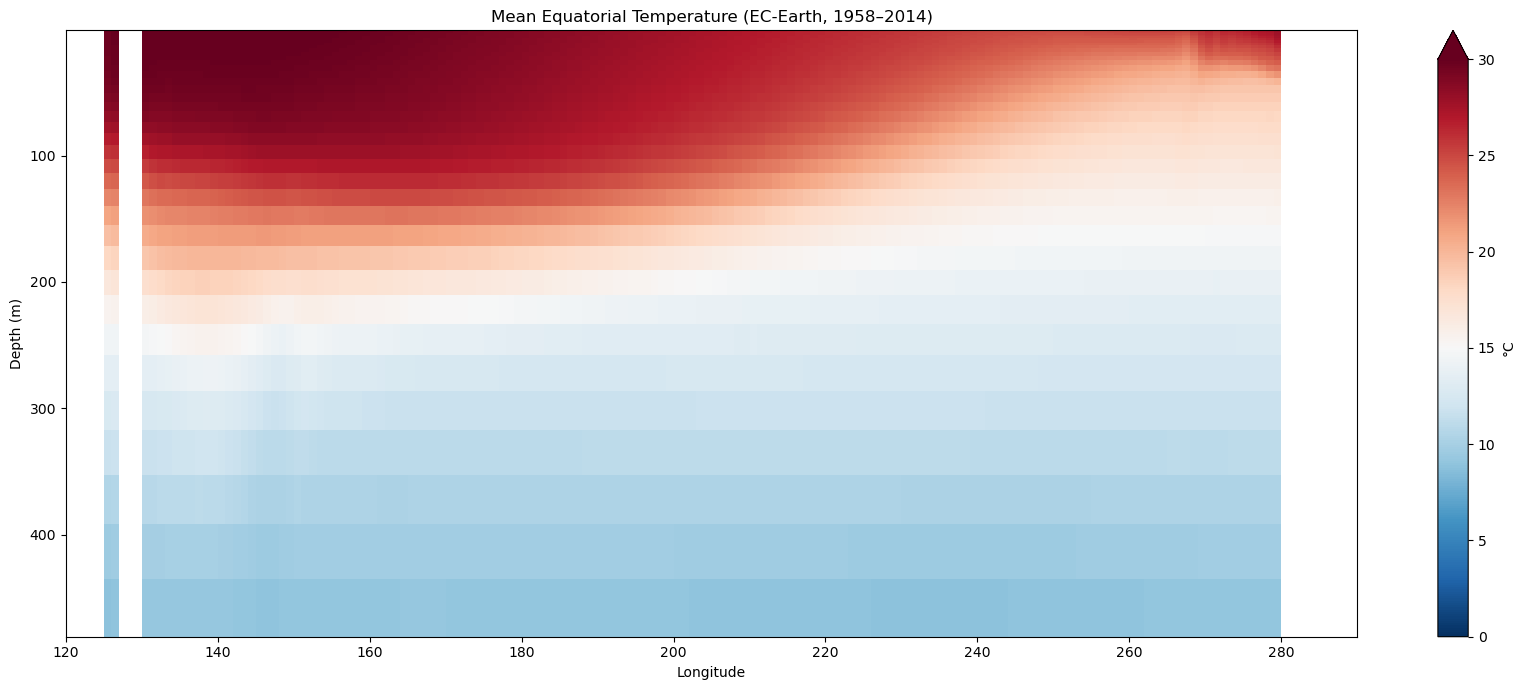

In [8]:
plt.figure(figsize=(17, 7))
equator_mean_EC.plot(
    cmap="RdBu_r",
    vmin=0,
    vmax=30,
    yincrease=False,  # makes depth increase downward
    cbar_kwargs={"label": "°C"}
)

plt.title("Mean Equatorial Temperature (EC-Earth, 1958–2014)")
plt.xlabel("Longitude")
plt.ylabel("Depth (m)")
plt.tight_layout()
plt.show()

### **-25°**

In [9]:
# Mean equator 
bp_EC = temp_EC["thetao"].sel(lat=-25, method="nearest")

# Subset the time to match ORAs (1958–2014)
bp_EC = bp_EC.sel(time=slice("1960-01-01", "1990-12-31"))

bp_mean_EC = bp_EC.mean(dim="time", skipna=True)
bp_mean_EC

<xarray.DataArray 'thetao' (lev: 38, lon: 170)>
dask.array<mean_agg-aggregate, shape=(38, 170), dtype=float32, chunksize=(38, 170), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 -24.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5

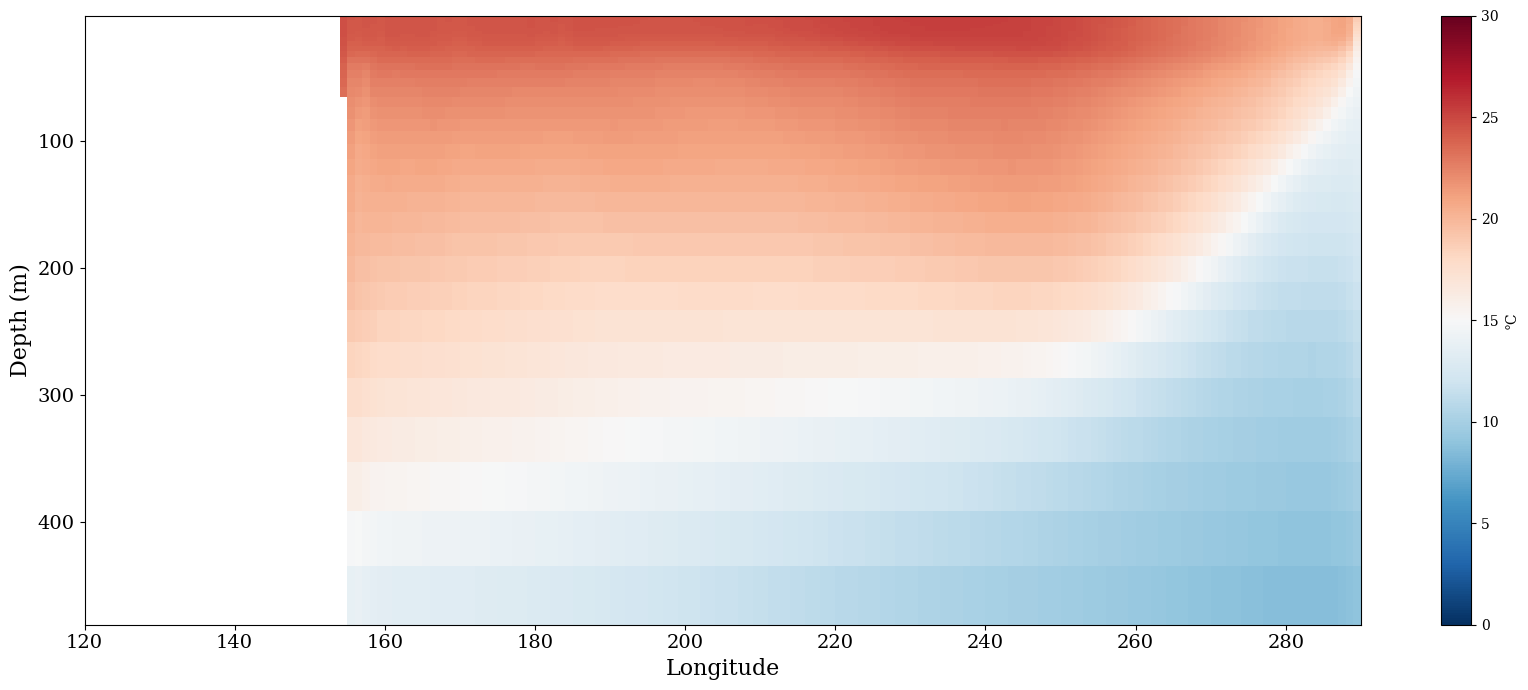

In [10]:
# Font
plt.rcParams['font.family'] = 'serif'

# Create figure
plt.figure(figsize=(17, 7))

# Plot
p = bp_mean_EC.plot(
    cmap="RdBu_r",
    vmin=0,
    vmax=30,
    yincrease=False,  # Depth increases downward
    cbar_kwargs={"label": "°C"}
)

# Remove title
p.axes.set_title("")

# Axis labels and ticks
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Depth (m)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

# Final layout and show
plt.tight_layout()
plt.savefig("mean_temp_ORAs5_25S.png", dpi=300)
plt.show()


# EC-Earth - ORAs equator

In [11]:
# Rename EC-Earth depth to match ORAs5
equator_mean_EC = equator_mean_EC.rename({'lev': 'deptht'})


In [12]:
bias = equator_mean_EC - equator_mean_ORAs
bias

<xarray.DataArray (deptht: 38, lon: 170)>
dask.array<sub, shape=(38, 170), dtype=float32, chunksize=(38, 170), chunktype=numpy.ndarray>
Coordinates:
  * deptht   (deptht) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 0.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5

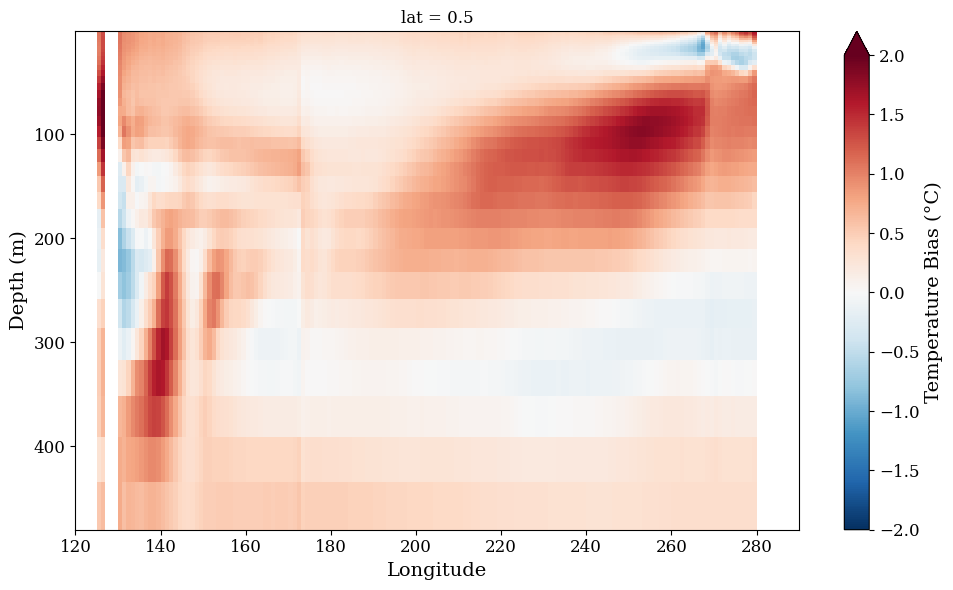

In [13]:
# Font
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 6))

# Create the plot and keep a reference to the colorbar
plot = bias.plot(
    cmap="RdBu_r",
    vmin=-2, vmax=2,
    cbar_kwargs={'label': 'Temperature Bias (°C)', 'shrink': 1.0}
)

# Update axis labels
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Depth (m)", fontsize=14)

# Update tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Invert y-axis
plt.gca().invert_yaxis()

# Update colorbar label font size
plot.colorbar.ax.tick_params(labelsize=12)  # colorbar ticks
plot.colorbar.set_label("Temperature Bias (°C)", fontsize=14)  # colorbar title

plt.grid(False)
plt.tight_layout()

# Save the figure
plt.savefig("temperature_bias_equator.png", dpi=300)

plt.show()


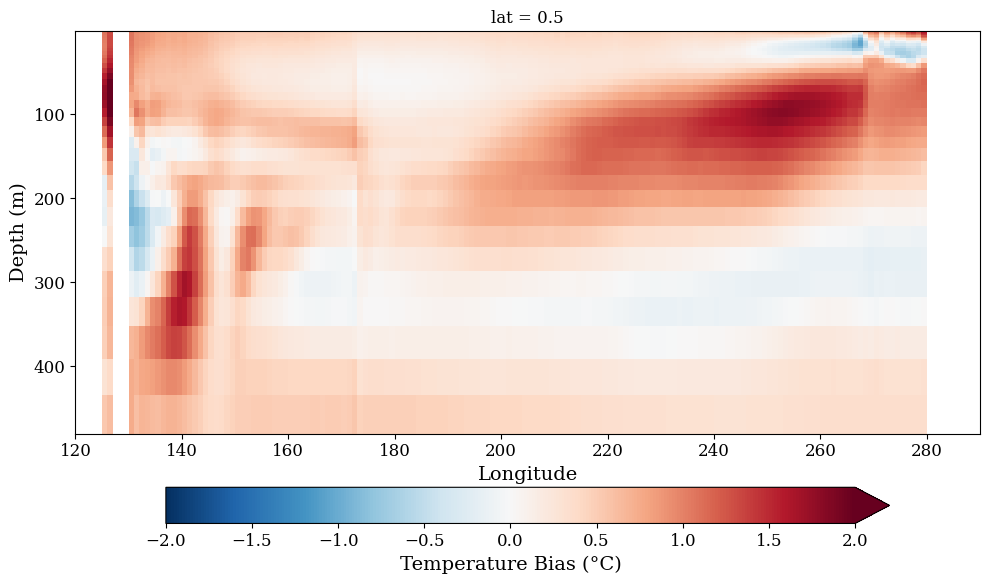

In [13]:
#Font
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 6))

# Create the plot with a horizontal colorbar
plot = bias.plot(
    cmap="RdBu_r",
    vmin=-2, vmax=2,
    cbar_kwargs={
        'label': 'Temperature Bias (°C)',
        'shrink': 0.8,
        'orientation': 'horizontal',
        'pad': 0.1  # adds space between plot and colorbar
    }
)

# Update axis labels
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Depth (m)", fontsize=14)

# Update tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Invert y-axis
plt.gca().invert_yaxis()

# Colorbar
plot.colorbar.ax.tick_params(labelsize=12)
plot.colorbar.set_label("Temperature Bias (°C)", fontsize=14)

# Final layout tweaks
plt.grid(False)
plt.tight_layout()

# Save the figure
plt.savefig("temperature_bias_equator.png", dpi=300)

plt.show()


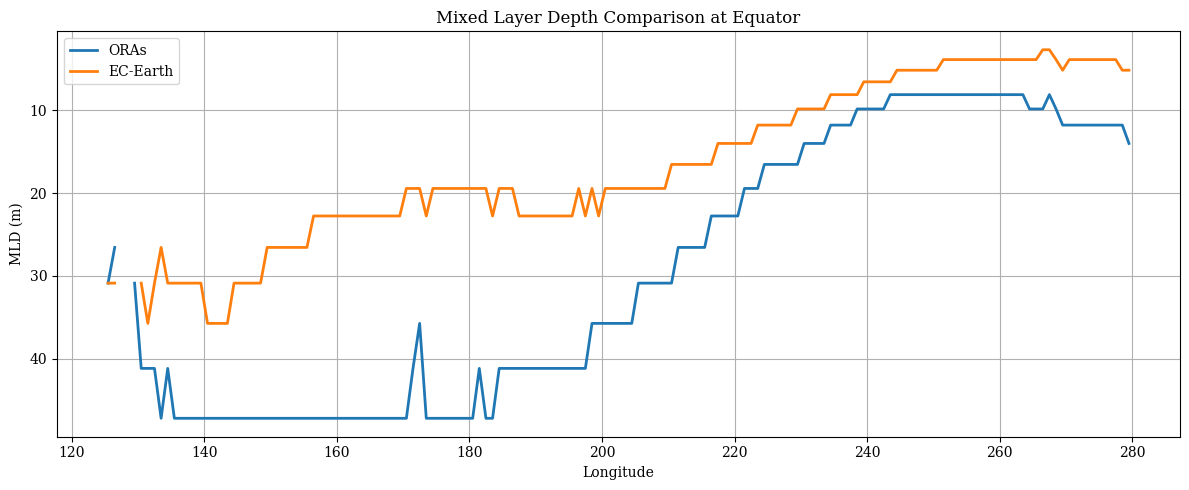

In [29]:
# 1. Subset the temperature fields at the equator
T_oras_5S = temp["votemper"].sel(lat=0, method="nearest").mean(dim="time", skipna=True)
T_ec_5S = temp_EC["thetao"].sel(lat=0, method="nearest").sel(time=slice("1958-01-01", "2014-12-31")).mean(dim="time", skipna=True)

# 2. Extract coordinates
lon_oras = T_oras_5S["lon"].values
depth_oras = T_oras_5S["deptht"].values
lon_ec = T_ec_5S["lon"].values
depth_ec = T_ec_5S["lev"].values

# 3. Compute MLD for ORAs
mld_oras_5S = np.full_like(lon_oras, fill_value=np.nan)
for i in range(len(lon_oras)):
    profile = T_oras_5S[:, i].values
    if np.isnan(profile[0]):
        continue
    T0 = profile[0]
    thresh = T0 - 0.2
    idx = np.where(profile < thresh)[0]
    if len(idx) > 0:
        mld_oras_5S[i] = depth_oras[idx[0]]

# 4. Compute MLD for EC-Earth
mld_ec_5S = np.full_like(lon_ec, fill_value=np.nan)
for i in range(len(lon_ec)):
    profile = T_ec_5S[:, i].values
    if np.isnan(profile[0]):
        continue
    T0 = profile[0]
    thresh = T0 - 0.2
    idx = np.where(profile < thresh)[0]
    if len(idx) > 0:
        mld_ec_5S[i] = depth_ec[idx[0]]

# 5. Plot both on the same figure
plt.figure(figsize=(12, 5))
plt.plot(lon_oras, mld_oras_5S, label="ORAs", linewidth=2)
plt.plot(lon_ec, mld_ec_5S, label="EC-Earth", linewidth=2)

plt.gca().invert_yaxis()
plt.title("Mixed Layer Depth Comparison at Equator")
plt.xlabel("Longitude")
plt.ylabel("MLD (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ORAs VS EC-Earth op 25°

In [12]:
# Rename EC-Earth depth to match ORAs5
bp_mean_EC = bp_mean_EC.rename({'lev': 'deptht'})

In [13]:
bias_25 = bp_mean_EC - bp_mean_ORAs
bias_25

<xarray.DataArray (deptht: 38, lon: 170)>
dask.array<sub, shape=(38, 170), dtype=float32, chunksize=(38, 170), chunktype=numpy.ndarray>
Coordinates:
  * deptht   (deptht) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 -24.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5

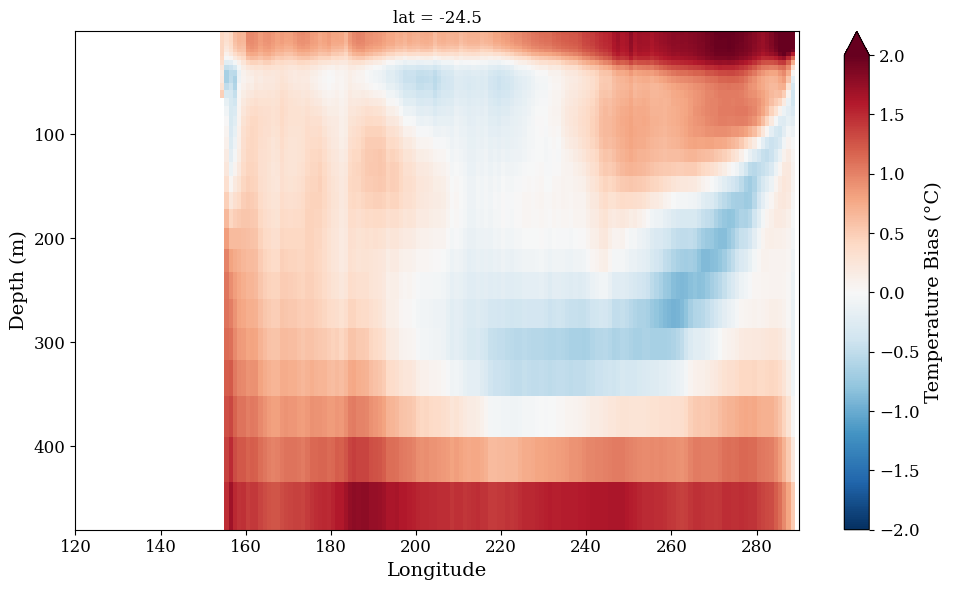

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 6))

# Create the plot and keep a reference to the colorbar
plot = bias_25.plot(
    cmap="RdBu_r",
    vmin=-2, vmax=2,
    cbar_kwargs={'label': 'Temperature Bias (°C)', 'shrink': 1.0}
)

# Update axis labels
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Depth (m)", fontsize=14)

# Update tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Invert y-axis (depth increasing downward)
plt.gca().invert_yaxis()

# Update colorbar label font size
plot.colorbar.ax.tick_params(labelsize=12)  # colorbar ticks
plot.colorbar.set_label("Temperature Bias (°C)", fontsize=14)  # colorbar title

plt.grid(False)
plt.tight_layout()

# Save the figure
plt.savefig("temperature_bias_25.png", dpi=300)

plt.show()

In [21]:
# ORAs
bp_ORAs = temp["votemper"].sel(lat=-25, method="nearest")
bp_mean_ORAs = bp_ORAs.mean(dim="time", skipna=True)

# EC-Earth
bp_EC = temp_EC["thetao"].sel(lat=-25, method="nearest")
bp_EC = bp_EC.sel(time=slice("1958-01-01", "2014-12-31"))
bp_mean_EC = bp_EC.mean(dim="time", skipna=True)


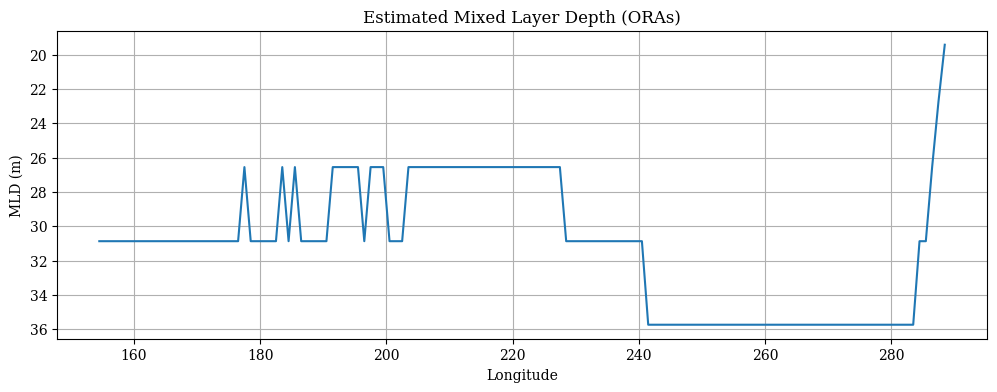

In [22]:
# Select a single profile at a representative longitude (or do it for all)
# Let's do this for ORAs:
T_oras = bp_mean_ORAs  # (deptht, lon)

# Create an empty array to store MLDs
mld_oras = np.full_like(T_oras.lon.values, fill_value=np.nan)

# Loop over longitudes
for i, lon in enumerate(T_oras.lon.values):
    temp_profile = T_oras[:, i].values  # temp vs. depth
    depth_profile = T_oras["deptht"].values
    
    # Skip if NaNs dominate
    if np.isnan(temp_profile[0]):
        continue

    T_surface = temp_profile[0]  # surface temperature
    T_thresh = T_surface - 0.2   # threshold

    # Find first depth where temp drops below the threshold
    below_thresh = np.where(temp_profile < T_thresh)[0]
    if len(below_thresh) > 0:
        mld_oras[i] = depth_profile[below_thresh[0]]  # first crossing

# Plot the MLD
plt.figure(figsize=(12, 4))
plt.plot(T_oras.lon.values, mld_oras)
plt.gca().invert_yaxis()
plt.title("Estimated Mixed Layer Depth (ORAs)")
plt.xlabel("Longitude")
plt.ylabel("MLD (m)")
plt.grid()
plt.show()


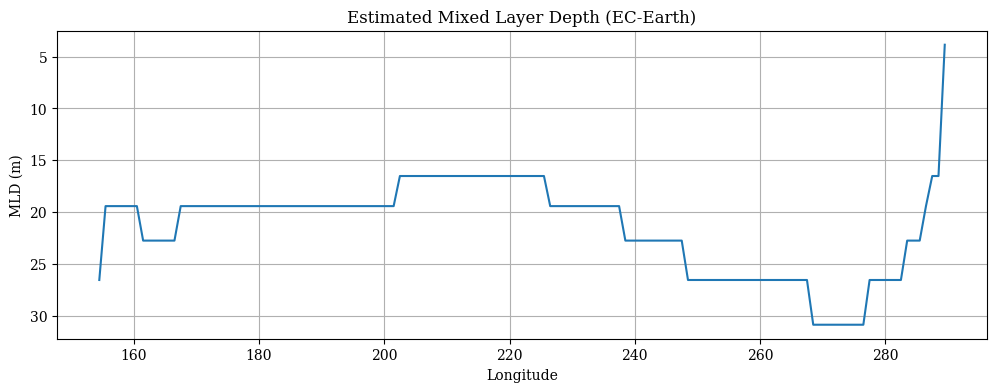

In [23]:
# Select a single profile at a representative longitude (or do it for all)
# Let's do this for ORAs:
T_EC = bp_mean_EC  # (deptht, lon)

# Create an empty array to store MLDs
mld_EC = np.full_like(T_EC.lon.values, fill_value=np.nan)

# Loop over longitudes
for i, lon in enumerate(T_EC.lon.values):
    temp_profile = T_EC[:, i].values  # temp vs. depth
    depth_profile = T_EC["lev"].values
    
    # Skip if NaNs dominate
    if np.isnan(temp_profile[0]):
        continue

    T_surface = temp_profile[0]  # surface temperature
    T_thresh = T_surface - 0.2   # threshold

    # Find first depth where temp drops below the threshold
    below_thresh = np.where(temp_profile < T_thresh)[0]
    if len(below_thresh) > 0:
        mld_EC[i] = depth_profile[below_thresh[0]]  # first crossing

# Plot the MLD
plt.figure(figsize=(12, 4))
plt.plot(T_EC.lon.values, mld_EC)
plt.gca().invert_yaxis()
plt.title("Estimated Mixed Layer Depth (EC-Earth)")
plt.xlabel("Longitude")
plt.ylabel("MLD (m)")
plt.grid()
plt.show()


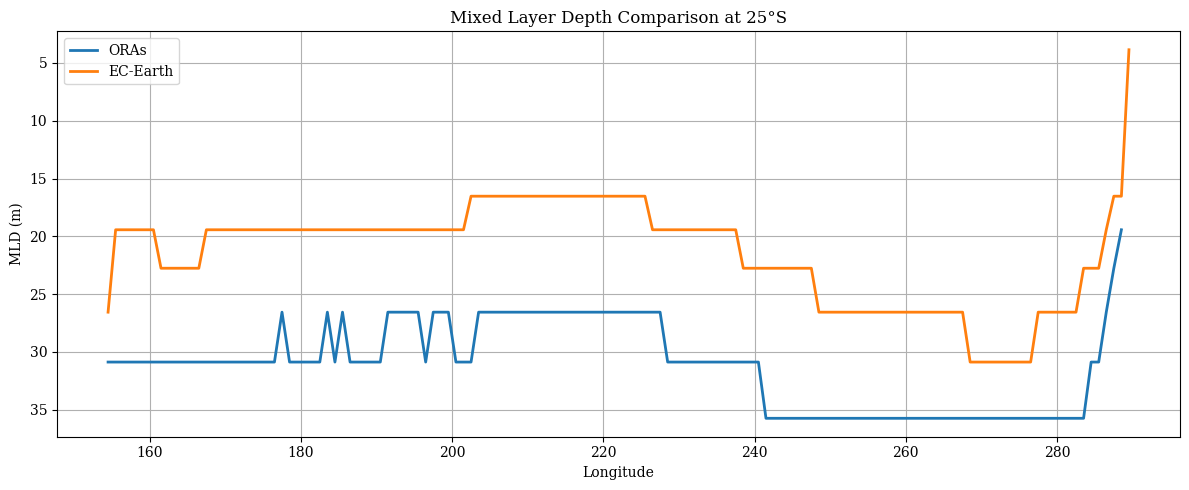

In [25]:
plt.figure(figsize=(12, 5))

# Plot ORAs MLD
plt.plot(T_EC.lon.values, mld_oras, label="ORAs", linewidth=2)

# Plot EC-Earth MLD
plt.plot(T_EC.lon.values, mld_EC, label="EC-Earth", linewidth=2)

# Reverse y-axis so deeper values are lower
plt.gca().invert_yaxis()

# Labels and formatting
plt.title("Mixed Layer Depth Comparison at 25°S")
plt.xlabel("Longitude")
plt.ylabel("MLD (m)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("MLD_25.png", dpi=300)
plt.show()


# ORAs vs EC-Earth op 0 graden 